In [2]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

3.2 Load the Data

In [142]:
df = pd.read_csv('data/spam.csv', encoding='latin1')
#for large data set
#df = pd.read_csv('data/emails_new_train.csv', encoding='latin1')

In [143]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#FF00CC")]}
])
styled_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


 Data Cleaning

In [144]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [145]:
styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


Rename the Column

In [148]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)
#df.rename(columns = {'spam': 'target', 'text': 'text'}, inplace = True)

 Convert the target variable

In [149]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [150]:
styled_df = df.head().style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


Check Missing values

In [151]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

Check Duplicate values

In [152]:
df.duplicated().sum()

np.int64(128)

In [153]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

In [154]:
df.shape

(2657, 2)

Percentage of Ham and Spam

In [155]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 86.52615732028603
percentage of 1 : 13.473842679713963


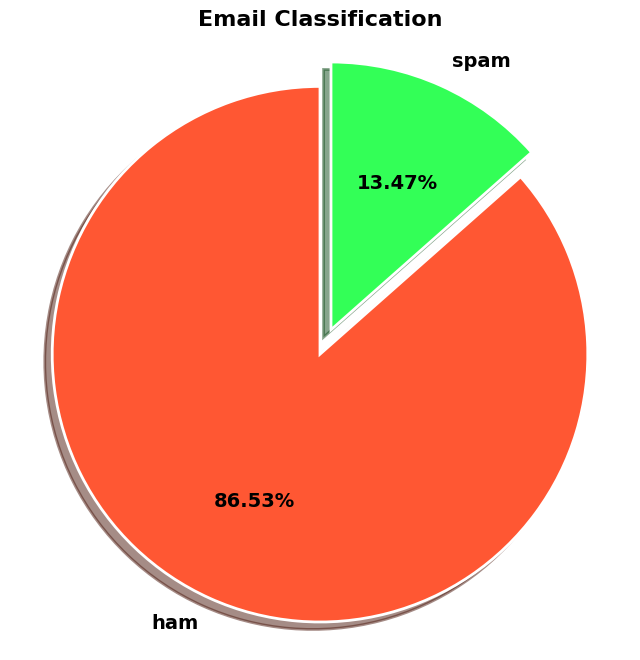

In [156]:
import matplotlib.pyplot as plt
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

Character Length Distribution for Legitimate and Spam Messages

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

KeyError: 'num_characters'

<Figure size 1000x600 with 0 Axes>

Data Preprocessing

In [104]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
        # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [105]:
from nltk import data
print(data.path)  # Shows where NLTK looks for data

['C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data', 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data', 'C:\\Users\\ASUS/nltk_data', 'C:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data', 'C:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data', 'C:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data', 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\ASUS\\nltk_data']


In [106]:
# Manually set the primary NLTK data path
nltk.data.path = ["C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data"] + nltk.data.path
nltk.download('punkt', download_dir="C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
import os
import shutil

# 1. CLEAN INSTALL OF NLTK DATA
def setup_nltk():
    # Clear existing data
    nltk_dir = os.path.join(os.path.expanduser("~"), "nltk_data")
    if os.path.exists(nltk_dir):
        shutil.rmtree(nltk_dir)
    
    # Set download directory
    download_dir = os.path.join(os.path.expanduser("~"), "nltk_data")
    os.makedirs(download_dir, exist_ok=True)
    nltk.data.path.append(download_dir)
    
    # Download required data
    nltk.download('punkt', download_dir=download_dir, quiet=True)
    nltk.download('stopwords', download_dir=download_dir, quiet=True)

# 2. ALTERNATIVE TOKENIZER
def safe_tokenize(text):
    try:
        return nltk.word_tokenize(text)
    except LookupError:
        # Fallback to regex tokenizer
        from nltk.tokenize import RegexpTokenizer
        tokenizer = RegexpTokenizer(r'\w+')
        return tokenizer.tokenize(text.lower())

# 3. MAIN PROCESSING FUNCTION
def transform_text(text):
    # Initialize stemmer
    ps = PorterStemmer()
    
    # Setup NLTK (only runs once)
    if not hasattr(transform_text, '_nltk_initialized'):
        setup_nltk()
        transform_text._nltk_initialized = True
    
    # Processing pipeline
    text = text.lower()
    tokens = safe_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    tokens = [ps.stem(word) for word in tokens]
    
    return " ".join(tokens)

# Test the function
print(transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'))

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


Creating a New Column: 'transformed_text'

In [208]:
df['transformed_text'] = df['text'].apply(transform_text)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25152\87086937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [209]:
len(df['transformed_text'] )

2657

In [207]:
styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",themob check newest select content game tone gossip babe sport keep mobil fit funki text wap 82468
1,0,Ok lar... Joking wif u oni...,freez home yet rememb kiss mom morn love think miss yet
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,urgent tri contact u today draw show å 800 prize guarante call 09050001808 land line claim m95 valid12hr
3,0,U dun say so early hor... U c already then say...,readi big day tomorrow
4,0,"Nah I don't think he goes to usf, he lives around here though",bought one rington get text cost 3 pound offer tone etc


Find top 30 words of spam

In [159]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [160]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25152\2512895475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


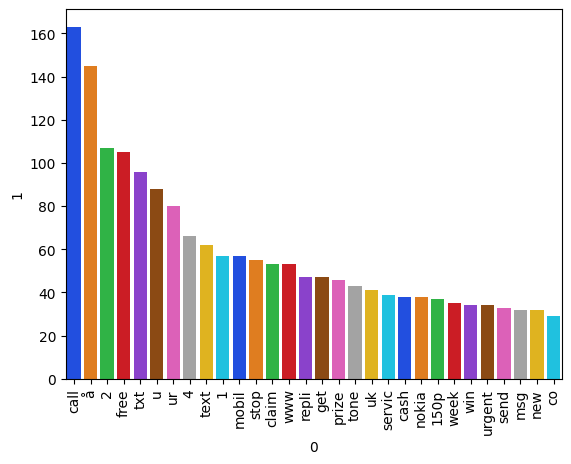

In [161]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

In [210]:
import numpy as np
from sklearn.utils import resample

# Convert to numpy arrays
messages = np.array(df['transformed_text'])
labels = np.array(df['target'])

# Check original distribution
print("Original distribution:")
print("Ham (0):", np.sum(labels == 0))
print("Spam (1):", np.sum(labels == 1))

# Separate majority (ham) and minority (spam)
ham_messages = messages[labels == 0]
ham_labels = labels[labels == 0]
spam_messages = messages[labels == 1]
spam_labels = labels[labels == 1]

# Downsample majority class to match minority
ham_messages_downsampled, ham_labels_downsampled = resample(
    ham_messages,
    ham_labels,
    replace=False,                # without replacement
    n_samples=len(spam_labels),   # match spam count
    random_state=42
)

# Combine and shuffle
balanced_messages = np.concatenate([ham_messages_downsampled, spam_messages])
balanced_labels = np.concatenate([ham_labels_downsampled, spam_labels])

# Shuffle the dataset
shuffle_idx = np.random.permutation(len(balanced_labels))
balanced_messages = balanced_messages[shuffle_idx]
balanced_labels = balanced_labels[shuffle_idx]

# Verify balanced distribution
print("\nBalanced distribution:")
unique, counts = np.unique(balanced_labels, return_counts=True)
print(dict(zip(unique, counts)))

Original distribution:
Ham (0): 2299
Spam (1): 358

Balanced distribution:
{np.int64(0): np.int64(358), np.int64(1): np.int64(358)}


Model Building

Initializing Bert as Feature extrature

In [136]:
from transformers import BertTokenizer, BertModel
import torch

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(texts, batch_size=8):
    """Convert a list of texts into BERT embeddings."""
    embeddings = []
    
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        
        # Tokenize batch
        inputs = tokenizer(
            batch, 
            return_tensors="pt", 
            padding=True, 
            truncation=True, 
            max_length=512  # BERT's max token limit
        )
        
        # Get embeddings (no gradient needed)
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Use [CLS] token embedding or mean pooling
        batch_embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling
        embeddings.append(batch_embeddings)
    
    return torch.cat(embeddings)

# Example usage
sentences = [
    "Hi John, just checking in...",
    "The quarterly financial report...",
    # ... (your other sentences)
]


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [137]:

bert_embeddings = get_bert_embeddings(df['transformed_text'].tolist())
print(bert_embeddings.shape)  # (num_sentences, 768)

KeyboardInterrupt: 

In [ ]:
# Convert embeddings to numpy
X_bert = bert_embeddings.numpy()

Initializing CountVectorizer and TfidfVectorizer

In [162]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [212]:
#X = tfid.fit_transform(df['transformed_text']).toarray()
#y = df['target'].values  balanced_messages
X = tfid.fit_transform(balanced_messages).toarray()
y = balanced_labels 

In [214]:
len(y)

716

In [215]:
test_messages_simple = [
    # Non-Spam (Ham) - 15 examples
    "Hi John, just checking in to see if you're still on for lunch tomorrow at 12:30 PM.",
    "The quarterly financial report has been uploaded to the shared drive for your review.",
    "Team meeting reminder: Wednesday at 3 PM in Conference Room A. Agenda attached.",
    "Your Amazon order #12345 has shipped and will arrive on Friday.",
    "Thanks for your application! We'll review your resume and get back to you next week.",
    "The software update has been completed successfully on all servers.",
    "Mom: Don't forget we're having family dinner this Sunday at 6 PM.",
    "Your monthly bank statement is now available in your online banking portal.",
    "The project deadline has been extended to March 15th per client request.",
    "Password reset confirmation: Your password was changed successfully.",
    "Doctor's appointment reminder: You have a checkup scheduled for May 3rd at 10 AM.",
    "Your subscription to Tech Magazine has been renewed automatically.",
    "The attached document contains the meeting minutes from yesterday's call.",
    "Your flight LAX to JFK is confirmed for departure at 8:45 AM tomorrow.",
    "HR Notification: Please complete your benefits enrollment by Friday.",

    # Spam - 5 examples
    "URGENT: Your account will be suspended unless you verify your details now!",
    "CONGRATULATIONS! You've won a free iPhone - click here to claim your prize!",
    "Make $10,000 a week from home with this simple trick! No experience needed!",
    "Your package couldn't be delivered - click this link to reschedule immediately!",
    "Limited time offer! Act now to get 90% off - this deal expires in 1 hour!"
]


In [216]:
transformed_new_sentences = [transform_text(sentence) for sentence in test_messages_simple]

In [217]:
X_new = tfid.transform(transformed_new_sentences).toarray()

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

Import the Models

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [232]:

knc = KNeighborsClassifier()
mnb = MultinomialNB()
svc = SVC(
        kernel='rbf',              # Better for complex patterns
        class_weight='balanced',
        probability=True,          # Enable predict_proba
        cache_size=1000,           # For large datasets
        random_state=42
)
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2) 

In [233]:
clfs = {
    'KNN': knc,
    'NB': mnb,
    'SVC': svc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt
    
}

In [234]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [235]:
len(y_train)

572

In [236]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_testing, test_labels)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

ValueError: X has 3000 features, but KNeighborsClassifier is expecting 2663 features as input.

In [230]:
len(X_train)

572

Prediction using TFIID AS Feature

In [229]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_new)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [125]:
from src import util as util
test_messages, test_labels = util.load_spam_dataset('data/test.tsv')

In [127]:
transformed_test = [transform_text(sentence) for sentence in test_messages]

In [129]:
X_testing = tfid.transform(transformed_test).toarray()

In [141]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_testing, test_labels)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  SVC
Accuracy:  0.557347670250896
Precision:  0.18309859154929578

For:  KNN
Accuracy:  0.5340501792114696
Precision:  0.16608996539792387

For:  NB
Accuracy:  0.6935483870967742
Precision:  0.23195876288659795

For:  DT
Accuracy:  0.13978494623655913
Precision:  0.12110091743119267

For:  LR
Accuracy:  0.26881720430107525
Precision:  0.11161731207289294

For:  RF
Accuracy:  0.26344086021505375
Precision:  0.10368663594470046

For:  Adaboost
Accuracy:  0.14336917562724014
Precision:  0.11873840445269017


KeyboardInterrupt: 

Balanced Data